Chi-square tests of independence assess the relationship between two categorical variables by examining their dependence or independence. These tests determine whether there exists a connection between the values of the two qualitative variables.

When the test reveals no association between the variables, it implies that the values of one variable do not provide any information about the values of the other variable. Conversely, if the test demonstrates a relationship between the variables, it indicates that knowing the value of one variable can offer insights into the value of the other variable.

$H_0$: the variables are independent, there is no relationship between the two categorical variables. Knowing the value of one variable does not help to predict the value of the other variable.
 
$H_a$: the variables are dependent, there is a relationship between the two categorical variables. Knowing the value of one variable helps to predict the value of the other variable

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.fetch_openml("absenteeism-at-work", version=1, as_frame=True, return_X_y=False)
data = data["frame"]

In [3]:
# remove nulls
data = data.dropna()

In [4]:
# Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories
data['Reason_for_absence'] = data['Reason_for_absence'].astype('category')

In [5]:
# day of the week is encoded to weekdays
data['Day_of_the_week'] = data['Day_of_the_week'].astype('category')
data['Day_of_the_week'] = data['Day_of_the_week'].cat.rename_categories(['Thursday','Monday','Tuesday','Wendesday','Friday'])

In [6]:
# seasons are encoded with names
data['Seasons'] = data['Seasons'].astype('category')
data['Seasons'] = data['Seasons'].cat.rename_categories(['Spring','Summer','Autumn','Winter'])

In [7]:
# binary data for employee disciplinary problems 
data['Disciplinary_failure'] = data['Disciplinary_failure'].astype('category')
data['Disciplinary_failure'] = data['Disciplinary_failure'].cat.rename_categories(['Yes','No'])

In [8]:
# encoded education level
data['Education'] = data['Education'].astype('category')
data['Education'] = data['Education'].cat.rename_categories(['High School','Graduate','PostGrad','Master and Dr'])

In [9]:
# social drinkers are binary encoded
data['Social_drinker'] = data['Social_drinker'].astype('category')
data['Social_drinker'] = data['Social_drinker'].cat.rename_categories(['Yes','No'])

In [10]:
# social smokers are binary encoded
data['Social_smoker'] = data['Social_smoker'].astype('category')
data['Social_smoker'] = data['Social_smoker'].cat.rename_categories(['Yes','No'])

In [11]:
data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11.0,26.0,7.0,Tuesday,Summer,289.0,36.0,13.0,33.0,239554.0,...,No,High School,2.0,Yes,No,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,Tuesday,Summer,118.0,13.0,18.0,50.0,239554.0,...,Yes,High School,1.0,Yes,No,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,Wendesday,Summer,179.0,51.0,18.0,38.0,239554.0,...,No,High School,0.0,Yes,No,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,Thursday,Summer,279.0,5.0,14.0,39.0,239554.0,...,No,High School,2.0,Yes,Yes,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,Thursday,Summer,289.0,36.0,13.0,33.0,239554.0,...,No,High School,2.0,Yes,No,1.0,90.0,172.0,30.0,2.0


In [12]:
# Calculate the threshold for the top 20%
threshold = data['Absenteeism_time_in_hours'].quantile(0.80)

# Assign labels based on the threshold
data['Target'] = data['Absenteeism_time_in_hours'].apply(lambda x: 1 if x >= threshold else 0)

data = data.drop(columns = ['Absenteeism_time_in_hours','ID'], axis = 1)

In [13]:
categorical_columns = data.select_dtypes(include=['category'])
categorical_columns['Target'] = data['Target']

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    categorical_columns.drop(columns = ['Target'], axis = 1),
    categorical_columns['Target'],
    test_size = 0.3,
    random_state = 101
)

In [15]:
chi_square_list = []

for feature in X_train.columns:
        
    # make contingency table
    contingency_table = pd.crosstab(y_train, X_train[feature])
        
    # collect p-value for chi-square test
    p_value = chi2_contingency(contingency_table)[1]
        
    # append chi-square array with p-value
    chi_square_list.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

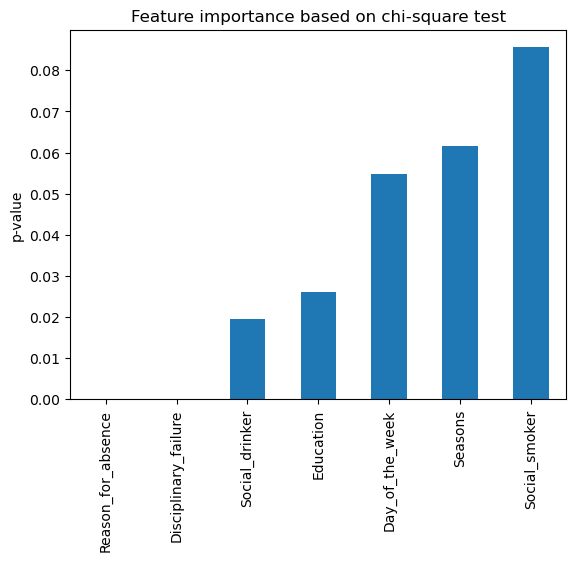

In [16]:
pd.Series(chi_square_list, index = X_train.columns).sort_values(ascending = True).plot(kind = 'bar')
plt.ylabel('p-value')
plt.title('Feature importance based on chi-square test')

In general, the p-value represents the probability of observing the obtained test statistic (or a more extreme value) under the assumption that the null hypothesis is true. The null hypothesis in the chi-square test for independence is that there is no relationship between the variables.

Here's a common interpretation of the p-value based on the significance level:

If the p-value is less than the chosen significance level (alpha, typically 0.05 or 0.01), it suggests that there is strong evidence to reject the null hypothesis. In this case, you would conclude that there is a significant relationship between the variables being tested, and dimensionality reduction based on the chi-square test would be warranted.

If the p-value is greater than the chosen significance level, it suggests that there is not enough evidence to reject the null hypothesis. In this case, you would fail to find a significant relationship between the variables, and it would not be advisable to use the chi-square test for dimensionality reduction.

In [17]:
# select 
selected = pd.Series(chi_square_list, index=X_train.columns).sort_values(
    ascending=True)

# Filter the Series based on a condition
selected = selected[selected <= 0.05].index

print(selected)

Index(['Reason_for_absence', 'Disciplinary_failure', 'Social_drinker',
       'Education'],
      dtype='object')
